100%|██████████| 10950/10950 [00:00<00:00, 18799.35it/s]


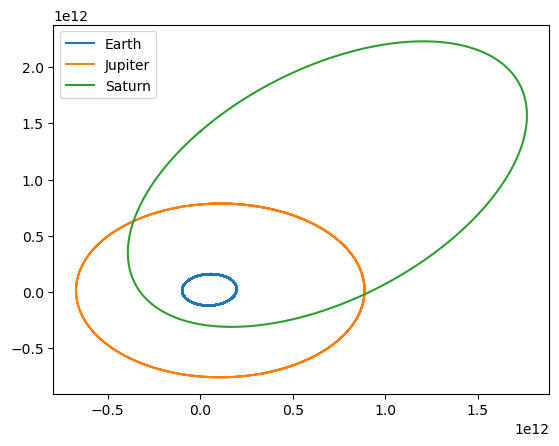

In [11]:

import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import tqdm

G  = 6.67430e-11
M__Sun = 1.989e30
M_Earth = 5.972e24
M_Jupiter = 1.898e27
M_Saturn = 5.683e26


jupyter_sun_distance = 778.57e9
saturn_sun_distance = 1.429e12
earth_sun_distance = 1.496e11


earth_average_speed = 29780
jupiter_average_speed = 13070
saturn_average_speed = 9690

class Planet: 
    def __init__(self,name,mass,position,velocity):
        self.name = name
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.temp = 0

class System:
    G  = 6.67430e-11
    time_step = 60*60*24
    
    def __init__(self,time = 0):
        self.planets = []
        self.M_Sun = 1.989e30
        self.Pos_Sun = np.array([0,0])
        self.time = time
        
    def add_planet(self,planet):
        self.planets.append(planet)

    def callculate_force_with_sun(self,planet):
        r = np.linalg.norm(planet.position - self.Pos_Sun)
        return -G * self.M_Sun * planet.mass / r**3 * (planet.position - self.Pos_Sun) 

    def update_planet_temp(self,planet):
        planet.temp =  np.linalg.norm(planet.position - self.Pos_Sun)

    def update_planet(self,planet):
        planet.position += planet.velocity * self.time_step
        planet.velocity += self.callculate_force_with_sun(planet) / planet.mass * self.time_step
        self.update_planet_temp(planet)

    def update(self):
        for planet in self.planets:
            self.update_planet(planet)
            self.time = self.time + self.time_step
    
    def run(self,n):
        trajectory = np.zeros((n,len(self.planets),2))
        for i in tqdm(range(n)):
            self.update()
            for j,planet in enumerate(self.planets):
                trajectory[i,j] = planet.position

        return trajectory

    def get_random_direction(self):
        direction = np.random.normal(-1,1,2)
        direction = direction/ np.linalg.norm(direction)
        return direction

    def visualize(self,trajectory):
        for i in range(len(self.planets)):
            plt.plot(trajectory[:,i,0],trajectory[:,i,1])

        plt.legend([p.name for p in self.planets])
        plt.show()



solar_system = System()


earth = Planet("Earth",M_Earth,np.array([0,earth_sun_distance]),earth_average_speed * solar_system.get_random_direction())
jupiter = Planet("Jupiter",M_Jupiter,np.array([0,jupyter_sun_distance]),jupiter_average_speed * solar_system.get_random_direction())
saturn = Planet("Saturn",M_Saturn,np.array([0,saturn_sun_distance]),saturn_average_speed * solar_system.get_random_direction())

solar_system.add_planet(earth)
solar_system.add_planet(jupiter)
solar_system.add_planet(saturn)



trajectory = solar_system.run(30*365)
solar_system.visualize(trajectory)

        

        

    




In [13]:
np.int8.__doc__

"Signed integer type, compatible with C ``char``.\n\n    :Character code: ``'b'``\n    :Canonical name: `numpy.byte`\n    :Alias on this platform (Linux x86_64): `numpy.int8`: 8-bit signed integer (``-128`` to ``127``)."

In [14]:
a = np.array([1],dtype = np.int8)

In [19]:
(a + 300).astype(np.int8)

array([45], dtype=int8)